This notebook examines the dynamic windage from using SalishSea BC12o, HRDPS, and 2016 SCT drifter data.

In [1]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from shapely.geometry.polygon import Polygon
from shapely.geometry import Point

In [2]:
with open ('/home/soontiensn/data/gpsc-work2/OPP/dynamic-windage-test/drifter_salish.txt') as f:
    drifters= f.read()

# SalishSea

In [3]:
def load_data(data_dir, region, drifters):
    alpha_real = []
    alpha_imag = []
    u_drifter = []
    v_drifter = []
    u_ocean = []
    v_ocean = []
    u_atmos = []
    v_atmos = []
    lon = []
    lat = []
    files = glob.glob(os.path.join(data_dir, '*/output', '*.nc'))
    for f in files:
        basename=os.path.basename(f)
        buoyid = basename.split('_')[-1].split('.nc')[0]
        if buoyid in drifters:
            d = xr.open_dataset(f)
            alpha_real.extend(d.alpha_real.values)
            alpha_imag.extend(d.alpha_imag.values)
            u_drifter.extend(d.ueast_drifter.values)
            v_drifter.extend(d.vnorth_drifter.values)
            u_ocean.extend(d.ueast_ocean.values)
            u_atmos.extend(d.ueast_atmos.values)
            v_ocean.extend(d.vnorth_ocean.values)
            v_atmos.extend(d.vnorth_atmos.values)
            lon.extend(d.lon.values)
            lat.extend(d.lat.values)
    else:
        print('drifter {} not used in simulations'.format(buoyid))
    
    alpha_real_mask = np.ma.masked_invalid(alpha_real)
    alpha_imag_mask = np.ma.masked_invalid(alpha_imag)
    u_drifter_mask = np.ma.masked_invalid(u_drifter)
    v_drifter_mask = np.ma.masked_invalid(v_drifter)
    u_ocean_mask = np.ma.masked_invalid(u_ocean)
    v_ocean_mask = np.ma.masked_invalid(v_ocean)
    u_atmos_mask = np.ma.masked_invalid(u_atmos)
    v_atmos_mask = np.ma.masked_invalid(v_atmos)
    lons = np.array(lon)
    lats = np.array(lat)
    # Check if position in region
    count=0
    for lon, lat in zip(lons, lats):
        point = Point(lon, lat)
        if not region.contains(point):
            lons[count] = np.nan
            lats[count] = np.nan
        count+=1
    lons = np.ma.masked_invalid(lons)
    lats = np.ma.masked_invalid(lats)
    d = xr.Dataset(
        #coords={'i', np.arange(lons.size)},
        data_vars={'lon': ('i', lons),
                   'lat': ('i', lats),
                   'ueast_drifter': ('i', u_drifter_mask),
                   'vnorth_drifter': ('i', v_drifter_mask),
                   'ueast_ocean': ('i', u_ocean_mask),
                   'vnorth_ocean': ('i', v_ocean_mask),
                   'ueast_atmos': ('i', u_atmos_mask),
                   'vnorth_atmos': ('i', v_atmos_mask),
                   'alpha_real': ('i', alpha_real_mask),
                   'alpha_imag': ('i', alpha_imag_mask),})
    d = d.dropna('i', how='any')
    return d

In [4]:
mesh = xr.open_dataset('/home/soontiensn/data/gpsc-work2/models/SalishSea-BC12/mesh_mask201702MD.nc')
polygon_coords = [[mesh.nav_lon.values[0,0], mesh.nav_lat.values[0,0]],
                  [mesh.nav_lon.values[0,-1], mesh.nav_lat.values[0,-1]],
                  [mesh.nav_lon.values[-1,-1], mesh.nav_lat.values[-1,-1]],
                  [mesh.nav_lon.values[-1,0], mesh.nav_lat.values[-1,0]]]
print(polygon_coords)

[[-123.429436, 46.859665], [-121.31835, 47.60092], [-124.34199, 51.1048], [-126.40029, 50.389927]]


In [5]:
region = Polygon(polygon_coords) 

In [6]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/dynamic-windage-test/SalishSea-IOS/'
dcombine = load_data(data_dir, region, drifters)

drifter wp3132544483D20160418 not used in simulations


In [7]:
dcombine

<xarray.Dataset>
Dimensions:         (i: 5848)
Dimensions without coordinates: i
Data variables:
    lon             (i) float64 -124.6 -124.6 -124.6 ... -123.4 -123.4 -123.4
    lat             (i) float64 48.42 48.43 48.43 48.44 ... 49.47 49.47 49.47
    ueast_drifter   (i) float64 -0.1235 0.02816 -0.03013 ... 0.006152 0.006557
    vnorth_drifter  (i) float64 0.2725 0.1461 0.149 ... -0.02206 -0.003023
    ueast_ocean     (i) float64 -0.01631 0.06588 0.1077 ... 0.01308 0.007075
    vnorth_ocean    (i) float64 -0.04723 -0.1416 -0.001955 ... 0.05552 0.06333
    ueast_atmos     (i) float64 3.643 4.312 4.592 4.782 ... 1.182 -0.7725 -1.011
    vnorth_atmos    (i) float64 0.4601 0.7952 0.4969 ... 1.676 -0.6785 -0.77
    alpha_real      (i) float64 -0.01806 0.003444 -0.02615 ... 0.05486 0.03195
    alpha_imag      (i) float64 0.09004 0.06609 0.0357 ... 0.05224 0.04129

In [8]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/dynamic-windage-test/SalishSea-IOS/'
alpha_real = []
alpha_imag = []
u_drifter = []
v_drifter = []
u_ocean = []
v_ocean = []
u_atmos = []
v_atmos = []
lon = []
lat = []
files = glob.glob(os.path.join(data_dir, '*/output', '*.nc'))
for f in files:
    basename=os.path.basename(f)
    buoyid = basename.split('_')[-1].split('.nc')[0]
    if buoyid in drifters:
        d = xr.open_dataset(f)
        alpha_real.extend(d.alpha_real.values)
        alpha_imag.extend(d.alpha_imag.values)
        u_drifter.extend(d.ueast_drifter.values)
        v_drifter.extend(d.vnorth_drifter.values)
        u_ocean.extend(d.ueast_ocean.values)
        u_atmos.extend(d.ueast_atmos.values)
        v_ocean.extend(d.vnorth_ocean.values)
        v_atmos.extend(d.vnorth_atmos.values)
        lon.extend(d.lon.values)
        lat.extend(d.lat.values)
    else:
        print('drifter {} not used in simulations'.format(buoyid))
    alpha_real_mask = np.ma.masked_invalid(alpha_real)
    alpha_imag_mask = np.ma.masked_invalid(alpha_imag)
    u_drifter_mask = np.ma.masked_invalid(alpha_real)
    alpha_imag_mask = np.ma.masked_invalid(alpha_imag)

In [9]:
alpha_real_mask = np.ma.masked_invalid(alpha_real)
alpha_real_trun =alpha_real_mask[~alpha_real_mask.mask]
print(np.nanmean(alpha_real_trun))
print(np.median(alpha_real_trun))
print(np.std(alpha_real_trun))
print(np.quantile(alpha_real_trun, 0.25))
print(np.quantile(alpha_real_trun, 0.75))

0.001677867020971134
0.00033832491435553273
0.20180181944419057
-0.03844515727065961
0.04002305640491458


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [10]:
print(np.nanmean(dcombine.alpha_real.values))
print(np.median(dcombine.alpha_real.values))
print(np.std(dcombine.alpha_real.values))
print(np.quantile(dcombine.alpha_real.values, 0.25))
print(np.quantile(dcombine.alpha_real.values, 0.75))

0.001677867020971134
0.00033832491435553273
0.20180181944419057
-0.03844515727065961
0.04002305640491458


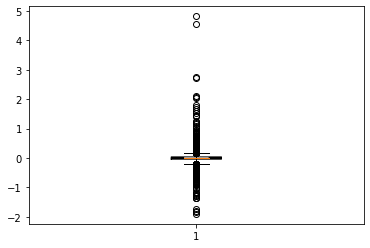

In [11]:
result = plt.boxplot(dcombine.alpha_real.values, whis=(5,95), bootstrap=1000, notch=True)

In [12]:
alpha_imag_mask = np.ma.masked_invalid(alpha_imag)
alpha_imag_trun =alpha_imag_mask[~alpha_imag_mask.mask]
print(np.nanmean(alpha_imag_trun))
print(np.median(alpha_imag_trun))
print(np.std(alpha_imag_trun))
print(np.quantile(alpha_imag_trun, 0.25))
print(np.quantile(alpha_imag_trun, 0.75))

-0.00011735164050997983
0.0005043717808039595
0.21359423901704336
-0.03257916527040663
0.036431670992142354


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [13]:
print(np.nanmean(dcombine.alpha_imag.values))
print(np.median(dcombine.alpha_imag.values))
print(np.std(dcombine.alpha_imag.values))
print(np.quantile(dcombine.alpha_imag.values, 0.25))
print(np.quantile(dcombine.alpha_imag.values, 0.75))

-0.00011735164050997983
0.0005043717808039595
0.21359423901704336
-0.03257916527040663
0.036431670992142354


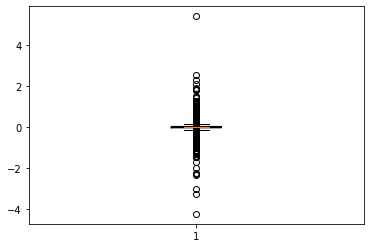

In [14]:
result = plt.boxplot(dcombine.alpha_imag.values, bootstrap=1000,notch=True)


Lots of outliers...

In [15]:
print(np.mean(dcombine.alpha_real.values), np.median(dcombine.alpha_real.values))
print(np.mean(dcombine.alpha_imag.values), np.median(dcombine.alpha_imag.values))

0.001677867020971134 0.00033832491435553273
-0.00011735164050997983 0.0005043717808039595


In [16]:
print(np.std(dcombine.alpha_real.values))
print(np.std(dcombine.alpha_imag.values))

0.20180181944419057
0.21359423901704336


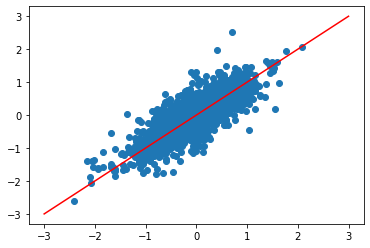

In [17]:
plt.scatter(dcombine.ueast_drifter, dcombine.ueast_ocean)
plt.plot([-3,3], [-3,3], 'r-')

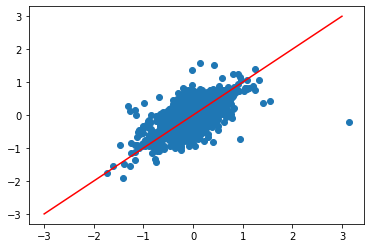

In [18]:
plt.scatter(dcombine.vnorth_drifter, dcombine.vnorth_ocean)
plt.plot([-3,3], [-3,3], 'r-')

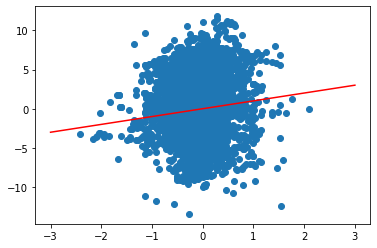

In [19]:
plt.scatter(dcombine.ueast_drifter, dcombine.ueast_atmos)
plt.plot([-3,3], [-3,3], 'r-')

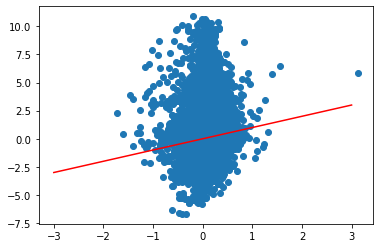

In [20]:
plt.scatter(dcombine.vnorth_drifter, dcombine.vnorth_atmos)
plt.plot([-3,3], [-3,3], 'r-')

In [21]:
len(alpha_real_trun)


5848

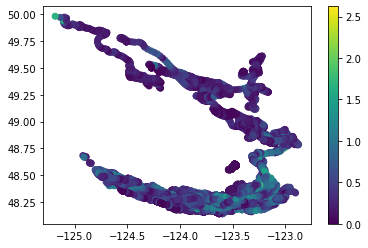

In [22]:
plt.scatter(dcombine.lon, dcombine.lat, c=np.sqrt(np.array(dcombine.ueast_ocean)**2 + np.array(dcombine.vnorth_ocean)**2))
plt.colorbar()

Identifying drifters outside of the domain isn't working - need to rework this part!! Many of the zero values for the ocean currents are because they are outside of the domain!

# CIOPSW

In [23]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/dynamic-windage-test/CIOPSWBC12-IOS/'
alpha_real = []
alpha_imag = []
u_drifter = []
v_drifter = []
u_ocean = []
v_ocean = []
u_atmos = []
v_atmos = []
lon = []
lat = []
files = glob.glob(os.path.join(data_dir, '*/output', '*.nc'))
for f in files:
    basename=os.path.basename(f)
    buoyid = basename.split('_')[-1].split('.nc')[0]
    if buoyid in drifters:
        d = xr.open_dataset(f)
        alpha_real.extend(d.alpha_real.values)
        alpha_imag.extend(d.alpha_imag.values)
        u_drifter.extend(d.ueast_drifter.values)
        v_drifter.extend(d.vnorth_drifter.values)
        u_ocean.extend(d.ueast_ocean.values)
        u_atmos.extend(d.ueast_atmos.values)
        v_ocean.extend(d.vnorth_ocean.values)
        v_atmos.extend(d.vnorth_atmos.values)
        lon.extend(d.lon.values)
        lat.extend(d.lat.values)
    else:
        print('drifter {} not used in simulations'.format(buoyid))

In [24]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/dynamic-windage-test/CIOPSWBC12-IOS/'
dcombine = load_data(data_dir, region, drifters)

drifter wp3132544483D20160418 not used in simulations


In [25]:
dcombine

<xarray.Dataset>
Dimensions:         (i: 5952)
Dimensions without coordinates: i
Data variables:
    lon             (i) float64 -124.6 -124.6 -124.6 ... -123.4 -123.4 -123.4
    lat             (i) float64 48.42 48.43 48.43 48.44 ... 49.47 49.47 49.47
    ueast_drifter   (i) float64 -0.1235 0.02816 -0.03013 ... 0.006152 0.006557
    vnorth_drifter  (i) float64 0.2725 0.1461 0.149 ... -0.02206 -0.003023
    ueast_ocean     (i) float64 0.006499 0.06649 0.01448 ... -0.003992 -0.006108
    vnorth_ocean    (i) float64 0.04721 0.02288 0.05338 ... 0.001387 0.002094
    ueast_atmos     (i) float64 3.643 4.312 4.592 4.782 ... 1.182 -0.7725 -1.011
    vnorth_atmos    (i) float64 0.4601 0.7952 0.4969 ... 1.676 -0.6785 -0.77
    alpha_real      (i) float64 -0.02744 -0.003501 ... 0.007636 -0.005489
    alpha_imag      (i) float64 0.0653 0.02922 0.02162 ... 0.02365 0.00924

In [26]:
alpha_real_mask = np.ma.masked_invalid(alpha_real)
alpha_real_trun =alpha_real_mask[~alpha_real_mask.mask]
print(np.nanmean(alpha_real_trun))
print(np.median(alpha_real_trun))
print(np.std(alpha_real_trun))
print(np.quantile(alpha_real_trun, 0.25))
print(np.quantile(alpha_real_trun, 0.75))

0.002979397502669687
0.004211707841019544
0.15934446929370963
-0.032562678743958864
0.041959266890763014


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [27]:
print(np.nanmean(dcombine.alpha_real.values))
print(np.median(dcombine.alpha_real.values))
print(np.std(dcombine.alpha_real.values))
print(np.quantile(dcombine.alpha_real.values, 0.25))
print(np.quantile(dcombine.alpha_real.values, 0.75))

0.002902332652109891
0.0030712874265027604
0.1751100308438205
-0.036471151414732665
0.04460628903840408


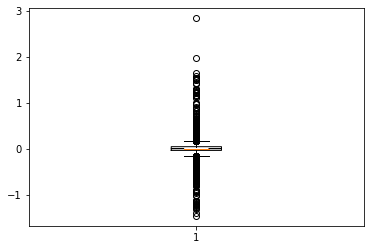

In [28]:
result = plt.boxplot(dcombine.alpha_real.values, bootstrap=1000, notch=True)

In [29]:
alpha_imag_mask = np.ma.masked_invalid(alpha_imag)
alpha_imag_trun =alpha_imag_mask[~alpha_imag_mask.mask]
print(np.nanmean(alpha_imag_trun))
print(np.median(alpha_imag_trun))
print(np.std(alpha_imag_trun))
print(np.quantile(alpha_imag_trun, 0.25))
print(np.quantile(alpha_imag_trun, 0.75))

-0.00046487386553185553
0.0008412138635815447
0.15572327751651086
-0.03056667476413956
0.03140241415694471


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [30]:
print(np.nanmean(dcombine.alpha_imag.values))
print(np.median(dcombine.alpha_imag.values))
print(np.std(dcombine.alpha_imag.values))
print(np.quantile(dcombine.alpha_imag.values, 0.25))
print(np.quantile(dcombine.alpha_imag.values, 0.75))

0.0012474691675687425
0.0022470846681858295
0.17497141610192507
-0.03034255228380912
0.03430964473762219


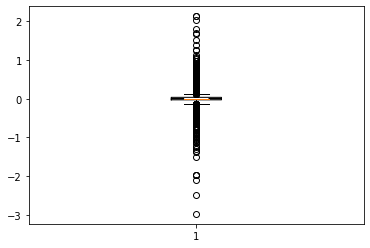

In [31]:
result = plt.boxplot(dcombine.alpha_imag.values, bootstrap=1000,notch=True)


In [32]:
print(np.mean(dcombine.alpha_real.values), np.median(dcombine.alpha_real.values))
print(np.mean(dcombine.alpha_imag.values), np.median(dcombine.alpha_imag.values))

0.002902332652109891 0.0030712874265027604
0.0012474691675687425 0.0022470846681858295


In [33]:
print(np.std(dcombine.alpha_real.values))
print(np.std(dcombine.alpha_imag.values))

0.1751100308438205
0.17497141610192507


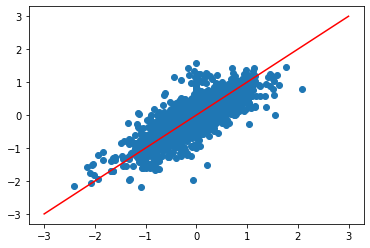

In [34]:
plt.scatter(dcombine.ueast_drifter.values, dcombine.ueast_ocean.values)
plt.plot([-3,3], [-3,3], 'r-')

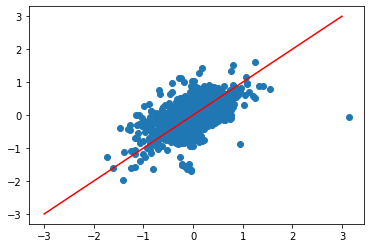

In [35]:
plt.scatter(dcombine.vnorth_drifter, dcombine.vnorth_ocean)
plt.plot([-3,3], [-3,3], 'r-')

In [36]:
len(alpha_real_trun)

8631

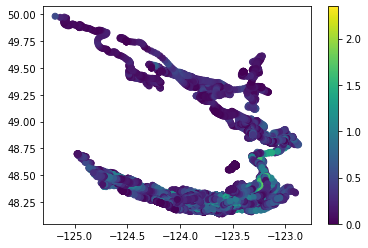

In [37]:
plt.scatter(dcombine.lon, dcombine.lat, c=np.sqrt(np.array(dcombine.ueast_ocean)**2 + np.array(dcombine.vnorth_ocean)**2))
plt.colorbar()

# Notes 
* ciopsw includes far more data - some drifters  started in SalishSea domain but then left. There is definately a better way of exluding points out outside of salishsea domain. But the the take home is clear - both Salish Sea and CIOPSW are identifying very low windage value 

# RIOPS

In [38]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/dynamic-windage-test/RIOPSBC12-IOS/'
alpha_real = []
alpha_imag = []
u_drifter = []
v_drifter = []
u_ocean = []
v_ocean = []
u_atmos = []
v_atmos = []
lon = []
lat = []
files = glob.glob(os.path.join(data_dir, '*/output', '*.nc'))
for f in files:
    basename=os.path.basename(f)
    buoyid = basename.split('_')[-1].split('.nc')[0]
    if buoyid in drifters:
        d = xr.open_dataset(f)
        alpha_real.extend(d.alpha_real.values)
        alpha_imag.extend(d.alpha_imag.values)
        u_drifter.extend(d.ueast_drifter.values)
        v_drifter.extend(d.vnorth_drifter.values)
        u_ocean.extend(d.ueast_ocean.values)
        u_atmos.extend(d.ueast_atmos.values)
        v_ocean.extend(d.vnorth_ocean.values)
        v_atmos.extend(d.vnorth_atmos.values)
        lon.extend(d.lon.values)
        lat.extend(d.lat.values)
    else:
        print('drifter {} not used in simulations'.format(buoyid))

In [39]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/dynamic-windage-test/RIOPSBC12-IOS/'
dcombine = load_data(data_dir, region, drifters)

drifter wp3132544483D20160418 not used in simulations


In [40]:
dcombine

<xarray.Dataset>
Dimensions:         (i: 5952)
Dimensions without coordinates: i
Data variables:
    lon             (i) float64 -124.6 -124.6 -124.6 ... -123.4 -123.4 -123.4
    lat             (i) float64 48.42 48.43 48.43 48.44 ... 49.47 49.47 49.47
    ueast_drifter   (i) float64 -0.1235 0.02816 -0.03013 ... 0.006152 0.006557
    vnorth_drifter  (i) float64 0.2725 0.1461 0.149 ... -0.02206 -0.003023
    ueast_ocean     (i) float64 0.2173 0.2539 0.3052 0.3122 ... 0.0 0.0 0.0 0.0
    vnorth_ocean    (i) float64 -0.1628 -0.1881 -0.1159 -0.02998 ... 0.0 0.0 0.0
    ueast_atmos     (i) float64 3.643 4.312 4.592 4.782 ... 1.182 -0.7725 -1.011
    vnorth_atmos    (i) float64 0.4601 0.7952 0.4969 ... 1.676 -0.6785 -0.77
    alpha_real      (i) float64 -0.07723 -0.03682 ... 0.009663 -0.002664
    alpha_imag      (i) float64 0.1292 0.0843 0.06484 ... 0.02007 0.005018

In [41]:
alpha_real_mask = np.ma.masked_invalid(alpha_real)
alpha_real_trun =alpha_real_mask[~alpha_real_mask.mask]
print(np.nanmean(alpha_real_trun))
print(np.median(alpha_real_trun))
print(np.std(alpha_real_trun))
print(np.quantile(alpha_real_trun, 0.25))
print(np.quantile(alpha_real_trun, 0.75))

-0.0007004692392053913
0.00022424275454596533
0.21352030580610581
-0.04211981351231926
0.04287526866902987


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [42]:
print(np.nanmean(dcombine.alpha_real.values))
print(np.median(dcombine.alpha_real.values))
print(np.std(dcombine.alpha_real.values))
print(np.quantile(dcombine.alpha_real.values, 0.25))
print(np.quantile(dcombine.alpha_real.values, 0.75))

0.0001473464537334067
0.00027377164364666593
0.24452028343539298
-0.04795464476475352
0.04797597869935549


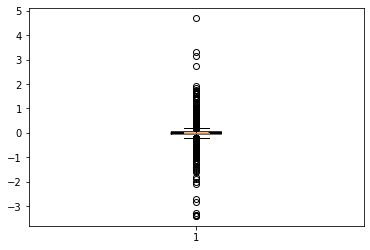

In [43]:
result = plt.boxplot(dcombine.alpha_real.values, whis=(5,95), bootstrap=1000, notch=True)

In [44]:
alpha_imag_mask = np.ma.masked_invalid(alpha_imag)
alpha_imag_trun =alpha_imag_mask[~alpha_imag_mask.mask]
print(np.nanmean(alpha_imag_trun))
print(np.median(alpha_imag_trun))
print(np.std(alpha_imag_trun))
print(np.quantile(alpha_imag_trun, 0.25))
print(np.quantile(alpha_imag_trun, 0.75))

0.006007822718851467
0.0022861721483462853
0.20597015530668433
-0.0315212832984057
0.038624555007324236


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [45]:
print(np.nanmean(dcombine.alpha_imag.values))
print(np.median(dcombine.alpha_imag.values))
print(np.std(dcombine.alpha_imag.values))
print(np.quantile(dcombine.alpha_imag.values, 0.25))
print(np.quantile(dcombine.alpha_imag.values, 0.75))

0.00647366541665456
0.0010641540797677474
0.23507315627427305
-0.03526900044199274
0.04056501475198986


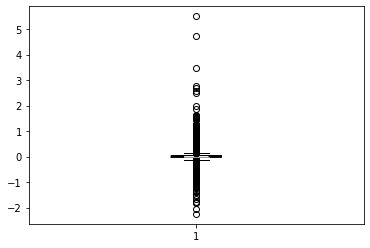

In [46]:
result = plt.boxplot(dcombine.alpha_imag.values, bootstrap=1000,notch=True)

In [47]:
print(np.mean(dcombine.alpha_real.values), np.median(dcombine.alpha_real.values))
print(np.mean(dcombine.alpha_imag.values), np.median(dcombine.alpha_imag.values))

0.0001473464537334067 0.00027377164364666593
0.00647366541665456 0.0010641540797677474


In [48]:
print(np.std(dcombine.alpha_real.values))
print(np.std(dcombine.alpha_imag.values))

0.24452028343539298
0.23507315627427305


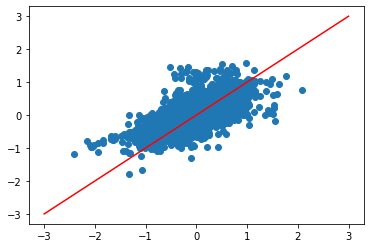

In [49]:
plt.scatter(dcombine.ueast_drifter, dcombine.ueast_ocean)
plt.plot([-3,3], [-3,3], 'r-')

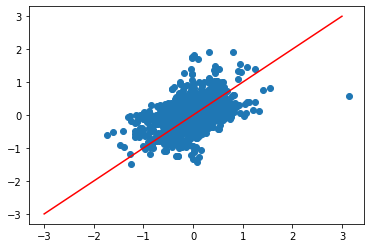

In [50]:
plt.scatter(dcombine.vnorth_drifter, dcombine.vnorth_ocean)
plt.plot([-3,3], [-3,3], 'r-')

In [51]:
len(alpha_real_trun)

8631

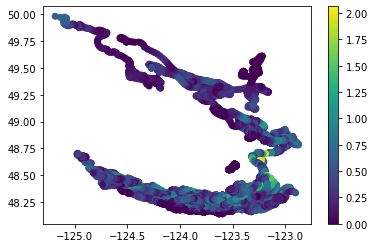

In [52]:
plt.scatter(dcombine.lon, dcombine.lat, c=np.sqrt(np.array(dcombine.ueast_ocean)**2 + np.array(dcombine.vnorth_ocean)**2))
plt.colorbar()